# London bike sharing analysis

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Reading the CSV data from two files and merge it into a single Data Frame

In [2]:
#reading the two CSV files
task_2a = pd.read_csv('task2a.csv')
task_2b = pd.read_csv('task2b.csv')

#merging the two csv files to a new dataframe 'pd_new'
pd_new = pd.merge(task_2a, task_2b)
pd_new

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3
...,...,...,...,...,...,...,...,...
17409,03/01/2017 19:00,1042,5.0,1.0,81.0,19.0,0,3
17410,03/01/2017 20:00,541,5.0,1.0,81.0,21.0,0,3
17411,03/01/2017 21:00,337,5.5,1.5,78.5,24.0,0,3
17412,03/01/2017 22:00,224,5.5,1.5,76.0,23.0,0,3


Although there were many methods used to combine the two CSV files like the 'concate' method,'merge' was used as it was more beneficial. It was able to automatically recognise the common column ('timestamp') in both files and use it as a key in order to join the two files using one-to-one joins. Therefore, it had lesser coding and hence was much faster.

## Investigating the distribution of bike shares by time of the day

'MatPlotlib' visualisation library was imported to plot the graph that was needed to investigate the distributions. To extract only the time from the 'timestamp' column, a new column named 'Time' was created. The 'groupby' function was used to obtain the mean bike shares for each hour of the day. The mean value was calculated and used as there are too many values and it would not give a clear graph by plotting all the values.

In [3]:
#creating a new column named 'time' to extract the time from the 'timestamp' column using 'dt.time' pandas attribute
pd_new['time'] = pd.to_datetime(pd_new['timestamp']).dt.time

#converting the data type of 'time' column to string
pd_new['time'] = pd_new['time'].astype(str)

#using the'.groupby' function to get the mean of the new bike shares by time of the day
temp = pd_new.groupby('time').mean().reset_index()[['time','new_bike_shares']]
temp

,time,new_bike_shares
0,00:00:00,290.609116
1,01:00:00,200.631215
2,02:00:00,136.303745
3,03:00:00,94.245492
4,04:00:00,73.313454
5,05:00:00,110.707351
6,06:00:00,466.626722
7,07:00:00,1468.745179
8,08:00:00,2882.823204
9,09:00:00,1653.019257


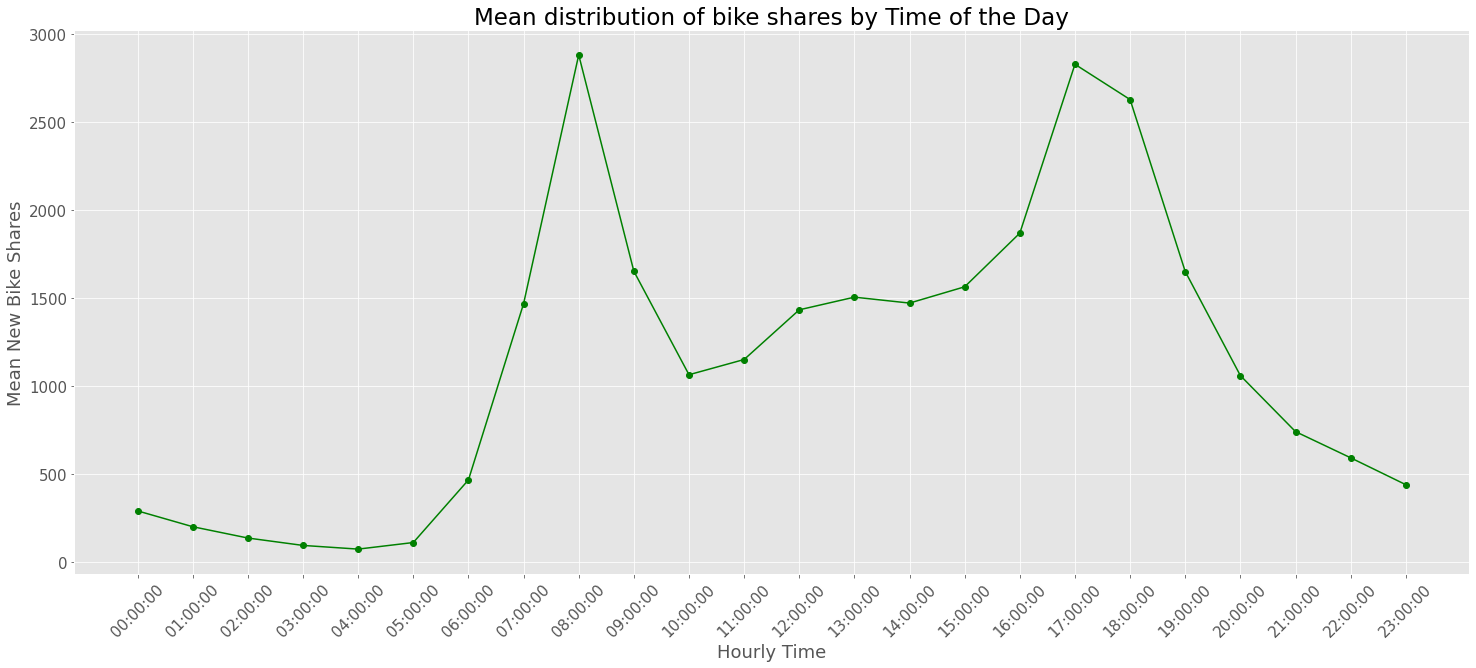

In [4]:
#using the 'ggplot' built-in style from the matplotlib library for the plot
plt.style.use('ggplot')

#specifying the dimensions of the graph
plt.figure(figsize=(25,10))      

#labelling the axes and changing the font size,  
plt.title('Mean distribution of bike shares by Time of the Day',size = 23)   
plt.ylabel('Mean New Bike Shares',size = 18)
plt.xlabel('Hourly Time',size = 18)

#rotating the x axis tick locations by an angle of 45 degrees and changing the font size of both axes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)

#plotting the graph where 'marker' is used to mark each point with a circle and, 'color' to plot the lines and points in green
plt.plot(temp['time'],temp['new_bike_shares'], marker = 'o', color = 'g');   

As per the above graph the lowest mean bike shares were recorded during dawn as people are likely to be in their homes asleep.  However, it starts to rise significantly after 05:00 and reaches a peak time at 8:00 with a mean bike share of 2,883 (rounded to the nearest whole number). This may be because it's the start of the day and people wake up early and start commuting to work or school. Thereafter it has a significant drop till 10:00. This is usually the time when people are settled and start work at workplaces or schools. 

Between 12:00 to 16:00, there is a slight increase in bike shares. This may be because of people commuting to restaurants for lunch breaks and students commuting due to schools closing.  Considering the morning and evening rush times, there's a significant increase where it reaches the evening peak time at 17:00 with a mean bike share of 2,830 (rounded to the nearest whole number). This is the time when people usually get off work and either go home or spend time with friends. Thereafter, it gradually decreases as commuting lessens due to nighttime. 

## Comparing the distribution of bike shares by time of the week

To extract only the date from the 'timestamp' column, a new column named 'day' was created. Numbers 0 - 6 represented the days of the week. The 'groupby' function was used to obtain the mean bike shares for each day of the week. The 'MatPlotlib' visualisation library was used to plot the graph and additionally a vertical line was drawn between 'Sat' to emphasize the difference between the number of bike shares on weekdays and the weekend. 

In [5]:
#creating a new column named 'day' to extract the date from the 'timestamp' column using 'dt.dayofweek' pandas attribute
pd_new['day'] = pd.to_datetime(pd_new['timestamp']).dt.dayofweek

#using the '.groupby' function to get the mean of the new bike shares by time of the week
temp = pd_new.groupby('day').mean().reset_index()[['day','new_bike_shares']]
temp

,day,new_bike_shares
0,0,1157.923201
1,1,1224.636623
2,2,1201.580684
3,3,1201.877657
4,4,1166.694888
5,5,1039.321229
6,6,1008.960505


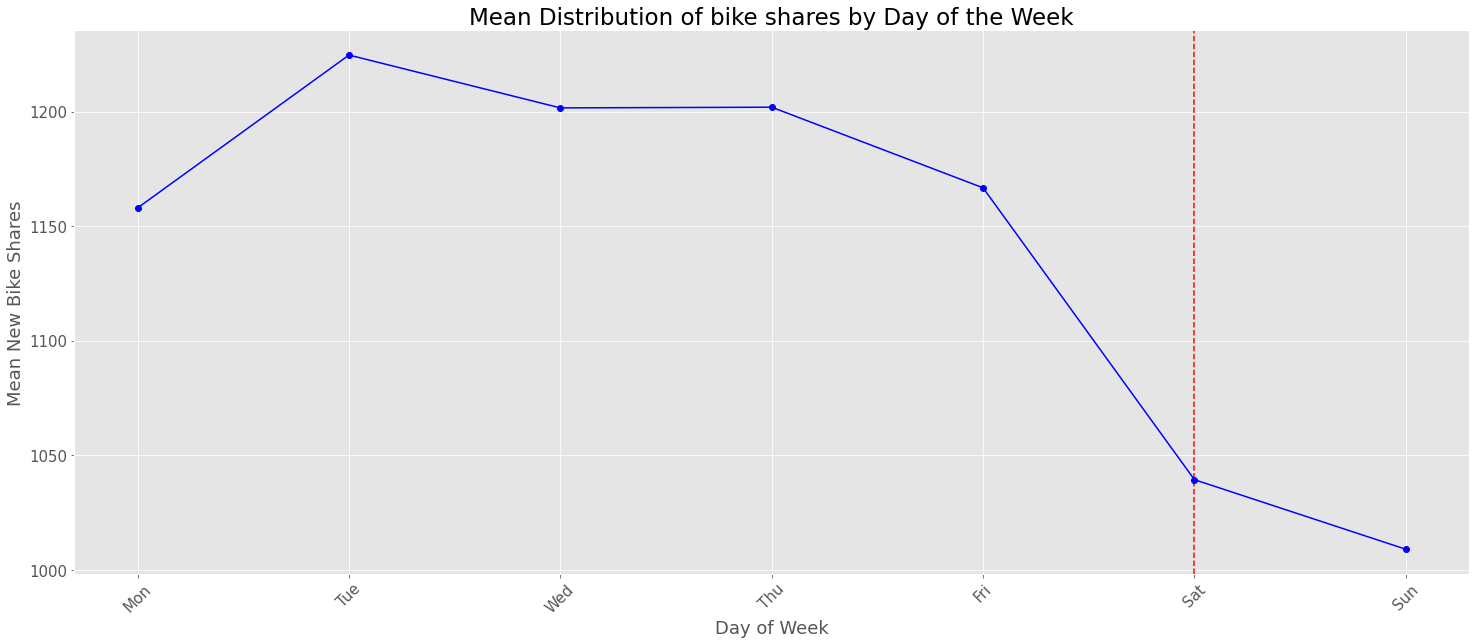

In [6]:
#specifying the dimensions of the graph
plt.figure(figsize=(25,10))  

#labelling the axes and changing the font size 
plt.title('Mean Distribution of bike shares by Day of the Week',size = 23)
plt.ylabel('Mean New Bike Shares',size = 18)
plt.xlabel('Day of Week',size = 18)

#labelling the x axis ticks by the weekday names,changing their font size and rotating the tick locations by 45 degrees
plt.xticks(range(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 45, fontsize = 15) 

#changing the font size of the y axis ticks 
plt.yticks(fontsize = 15)

#adding a vertical dotted line at x = 'Sat' to show the split between the weekdays and weekends
plt.axvline(x = 5, color = 'r', linestyle = '--')

#plotting the graph where 'marker' is used to mark each point with a circle and, 'color' to plot the lines and points in blue
plt.plot(temp['day'], temp['new_bike_shares'], marker = 'o', color = 'b'); 

Bike shares are often used by people for the purpose of traveling to work, schools, grocery stores as well as entertainment purposes. There is a variation in the usage of bike shares between weekdays and weekends. As per the above graph, the highest number of bike shares were recorded on weekdays specifically on Tuesdays, where the mean bike shares were 1,230 (rounded to the nearest whole number). This may be because, on weekdays,there are frequent commute trips with schools and workplaces open. With the arrival of the weekend, there are lower levels of commute activities hence, there is a significant drop in the bike shares on Saturday while it continues to drop further on Sunday. Overall, the graph shows a downward trend from Tuesdays till the weekend. 

## Investigating the effects of “feels like” temperature on the number of bike shares

'Heatmap' function of the 'Seaborn' visualisation library was used to plot a heatmap of the correlation matrix. The heatmap shows the correlation of one variable to every other variable pair-wise. It also enables the identification of variables that have a higher degree of correlation and a chance to reduce the number of features in a dataset. The 'seismic' colormap was chosen where the colors become stronger at either end of the divergence, as it gives a more clear representation of the dataset. To get a more detailed and statistical view of the correlation between just the two variables, 'feels_like_temp' and 'new_bike_shares', a correlation scatter plot with the linear regression line was plotted using 'regplot' method. 

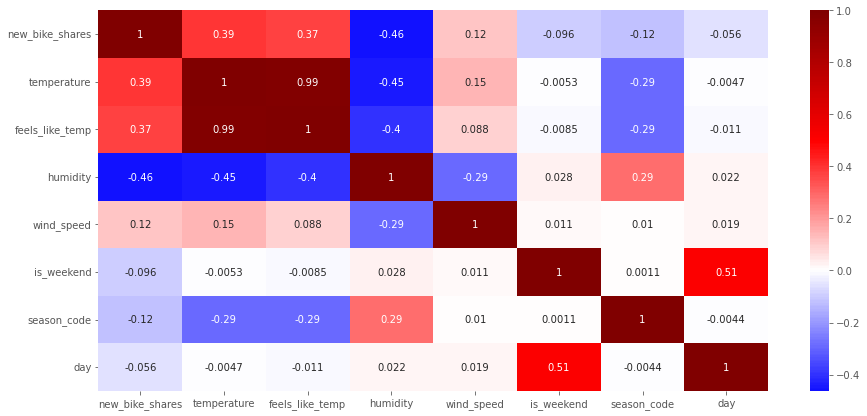

In [8]:
#using correlation matrices to investigate the relationship between 'feels_like_temp' on the 'new_bike_shares'
plt.subplots(figsize = (15,7))

#annot=True was used to display the data value in the cell of the matrix and center=0 was used to diverge the colors from zero
sns.heatmap(pd_new.corr(), annot = True, cmap = 'seismic', center = 0);

The above heatmap shows the correlation coefficients between all the variables. The correlation coefficient between 'feels_like_temp' and the 'new_bike_shares' is 0.37. Correlation measures the strength of the relationship. A positive correlation between the 2 variables is reflected since 0.37 is greater than zero. However, the strength of the relationship is considered weak as 0.37 is very close to zero. This means that when the 'feels like' temperature increases, the bike shares will also increase as people tend to go outdoors more when the weather is warmer.  

In [9]:
#using the '.groupby' function to get the mean of the 'new bike shares' by 'feels like temp'
temp = pd_new.groupby('feels_like_temp').mean().reset_index()[['feels_like_temp', 'new_bike_shares']]
temp

,feels_like_temp,new_bike_shares
0,-6.0,77.000000
1,-5.5,37.000000
2,-5.0,84.000000
3,-4.5,655.000000
4,-4.0,478.714286
...,...,...
77,32.0,2016.142857
78,32.5,3164.333333
79,33.0,1542.000000
80,33.5,2454.000000


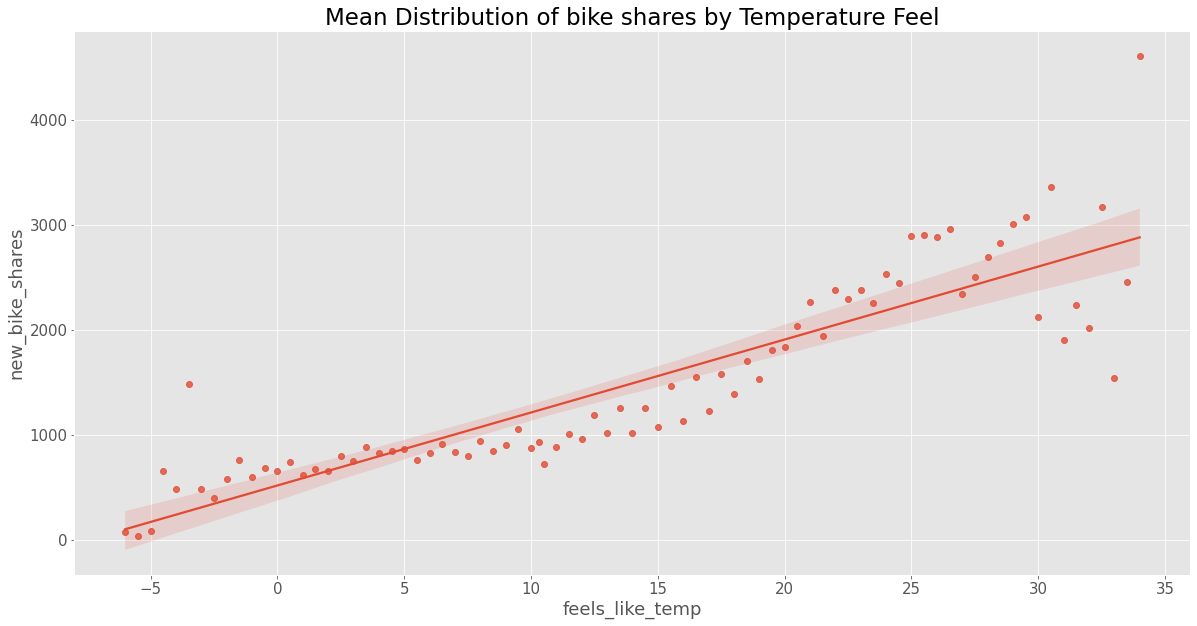

In [10]:
#specifying the dimensions of the graph
plt.figure(figsize=(20,10))

#labelling the axes and changing the font size
plt.title('Mean Distribution of bike shares by Temperature Feel',size = 23)
plt.ylabel('Mean New Bike Shares',size = 18)
plt.xlabel('Temperature Feel',size = 18)

#changing the font size of both axis ticks 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

sns.regplot(x = temp['feels_like_temp'], y = temp['new_bike_shares']);

As per the linear regression model, the above regression line shows a positive gradient which indicates a positive correlation between the two variables,'feels_like_temp' and the 'new_bike_shares'. However, it is a weak relationship since the slope is less steep. This means that when the 'feels like' temperature increases there is a slight increase in bike shares. Furthermore, a few outliers too can be noticed in the graph which may have affected any statistical calculations done.

## Testing the hypothesis that “feels like” temperature has an effect on the number of bike shares

Using 'Scipy' statistical significance tests, the pearson correlation coefficient and probability significance value (p-value) were found. The conclusion of the test was determined using an 'if else' function by checking whether the p-value is above the 5% significance level or not. 

In [13]:
# H0 : There is no relationship between 'feels like' temperature and number of bike shares
# H1 : There is a relationship between 'feels like' temperature and number of bike shares

cor_co, p = stats.pearsonr(pd_new['feels_like_temp'], pd_new['new_bike_shares']) 
print('Pearson correlation coefficient:', round(cor_co,2))
print('p-value:', p)

if p < 0.05:
    print ('Conclusion: There is significant evidence to reject H0 as p-value is less than 0.05')
else:
    print ('Conclusion: There is significant evidence to not reject H0 as p-value is less than 0.05')

Pearson correlation coefficient: 0.37
p-value: 0.0
Conclusion: There is significant evidence to reject H0 as p-value is less than 0.05


Since the p-value(zero) is less than 0.05 (5% significance level), there is significant evidence to reject the null hypothesis (H0) which states that there is no relationship between 'feels like' temperature and the number of bike shares. Thereby, along with the correlation coefficient of 0.37, it is possible to conclude that there is a weak but positive correlation between the two variables.